In [13]:
data_dir = r'Z:\projects\pathology-lung-cancer-weak-growth-pattern-prediction/results/tcga'
csv_path = r'Z:\projects\pathology-lung-cancer-weak-growth-pattern-prediction/data/tcga/slide_list_cga.csv'
output_dir = r'Z:\projects\pathology-lung-cancer-weak-growth-pattern-prediction/results/tcga/model'

In [14]:
import os
import pickle
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [16]:
label_dict_path = r'Z:\projects\pathology-lung-cancer-weak-growth-pattern-prediction/data/tcga/label_dict.pkl'

try:
    with open(label_dict_path, 'rb') as label_dict_file:
        label_dict = pickle.load(label_dict_file)
except:
    label_file_path = os.path.join(os.path.join(data_dir), 'slide_list_cga.csv')
    label_dict = {row[0]: row[1] for _, row in pd.read_csv(label_file_path).iterrows()}
    with open(label_dict_path, 'wb') as label_dict_file:
        pickle.dump(label_dict, label_dict_file)

In [17]:
class Dataset(torch.utils.data.Dataset):
    """
    Returns a sample of the data
    """
    def __init__(self, dir, file_names, preview=False):
        self.dir = dir
        self.file_names = file_names
        self.preview = preview
        
    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        image = np.load(os.path.join(self.dir, file_name))
        if self.preview:
            image = (255*(image - np.min(image))/np.ptp(image)).astype(int) 
        label = label_dict[file_name.replace('.npy', '')]
        return image, label        

    def __len__(self):
        return len(self.file_names)

    @property
    def labels(self):
        return np.array([label_dict[file_name.replace('.npy', '')] for file_name in self.file_names])


In [19]:
# get all file names
image_dir = os.path.realpath(data_dir + r'\featurized\tcga_luad\normal')
all_file_names = [file for file in os.listdir(image_dir) if file.split('_')[0].endswith('.npy')]

In [21]:
# Split data
split_factor = 0.2
valid_samples = round(len(all_file_names)*split_factor)

train_file_names = all_file_names[:-valid_samples]
valid_file_names = all_file_names[len(train_file_names):]

preview = Dataset(image_dir, all_file_names[:4], preview=True)
train = Dataset(image_dir, train_file_names)
valid = Dataset(image_dir, valid_file_names)

train_loader = torch.utils.data.DataLoader(train, 32, shuffle=True, num_workers=2)
valid_loader = torch.utils.data.DataLoader(valid, 32, shuffle=True, num_workers=2)

In [23]:
# Import Data
featurized_dir = r'Z:\projects\pathology-lung-cancer-weak-growth-pattern-prediction\results\tcga\featurized\tcga_luad\normal'
featurized_list = os.listdir(featurized_dir)

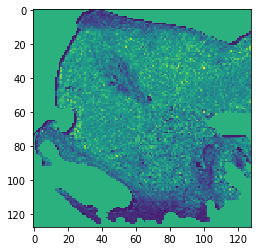

In [24]:
label_names = ['LUSC', 'LUAD']
image, label = preview.__getitem__(0)
sample_image = image[125]
plt.imshow(sample_image[:128, :128])
plt.show()

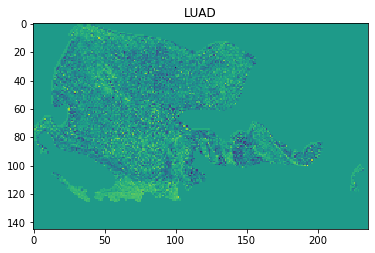

Image shape: (128, 145, 236)
Min value: 0, max value: 255


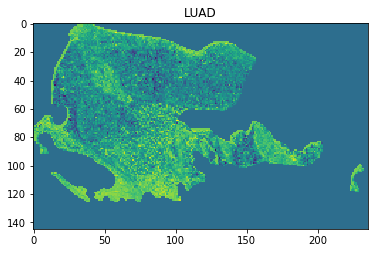

Image shape: (128, 145, 236)
Min value: 0, max value: 255


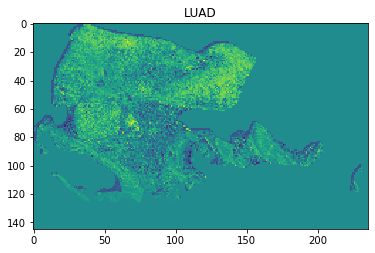

Image shape: (128, 145, 236)
Min value: 0, max value: 255


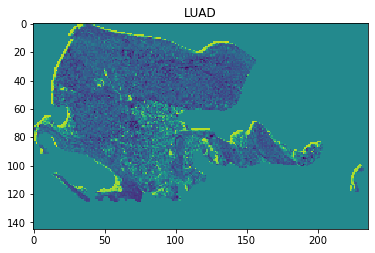

Image shape: (128, 145, 236)
Min value: 0, max value: 255


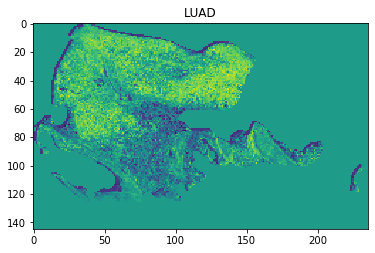

Image shape: (128, 145, 236)
Min value: 0, max value: 255


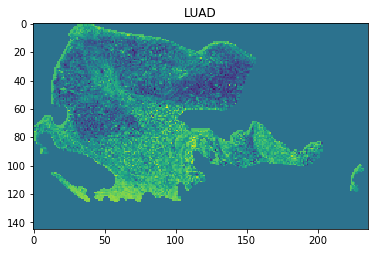

Image shape: (128, 145, 236)
Min value: 0, max value: 255


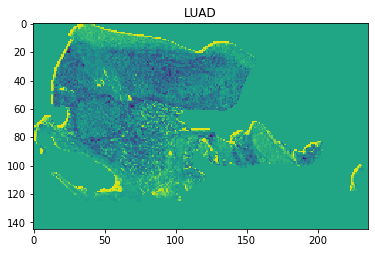

Image shape: (128, 145, 236)
Min value: 0, max value: 255


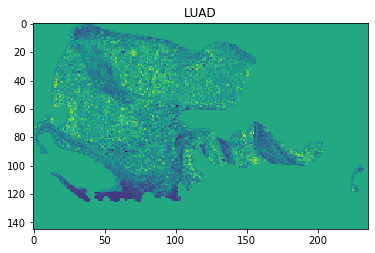

Image shape: (128, 145, 236)
Min value: 0, max value: 255


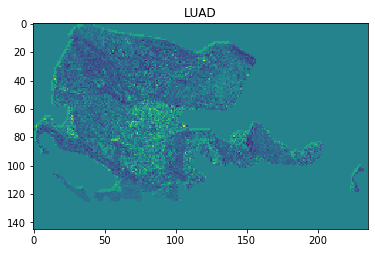

Image shape: (128, 145, 236)
Min value: 0, max value: 255


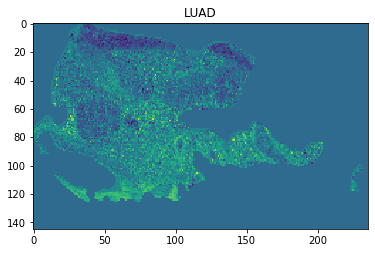

Image shape: (128, 145, 236)
Min value: 0, max value: 255


In [88]:
for idx in range(len(image[:10])):
    plt.title(label_names[label])
    plt.imshow(image[idx])
    plt.show()
    print(f'Image shape: {image.shape}')
    print(f'Min value: {image.min()}, max value: {image.max()}')

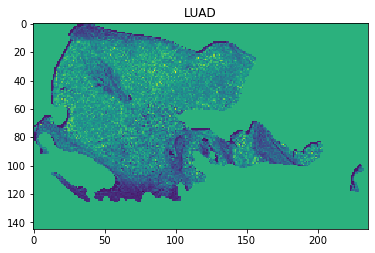

Image shape: (128, 145, 236)
Min value: 0, max value: 255


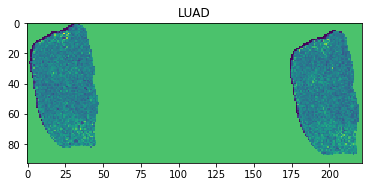

Image shape: (128, 93, 222)
Min value: 0, max value: 255


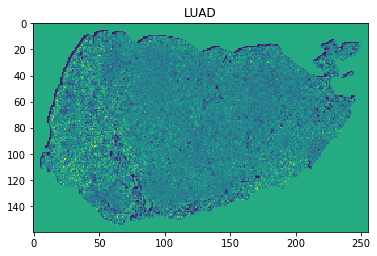

Image shape: (128, 160, 256)
Min value: 0, max value: 255


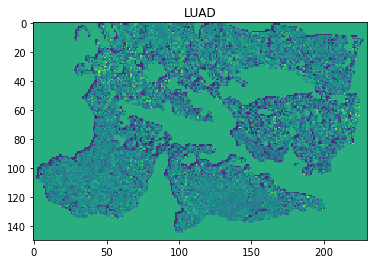

Image shape: (128, 150, 230)
Min value: 0, max value: 255


In [82]:
for image, label in preview:
    plt.title(label_names[label])
    slide = image[125]
    plt.imshow(slide)
    plt.show()
    print(f'Image shape: {image.shape}')
    print(f'Min value: {image.min()}, max value: {image.max()}')